In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
file_path = "./src/Spotify-Most-Streamed-Songs.csv"
spotify_data = pd.read_csv(file_path)

# Convertir la columna 'streams' a numerico
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Ordenar de mayor a menor por numero de streams
spotify_data = spotify_data.sort_values(by='streams', ascending=False)

# spotify_data.head()
spotify_data.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
cover_url                object
dtype: object

Claves Musicales y su relación con las reproducciones:

<Axes: xlabel='key', ylabel='streams'>

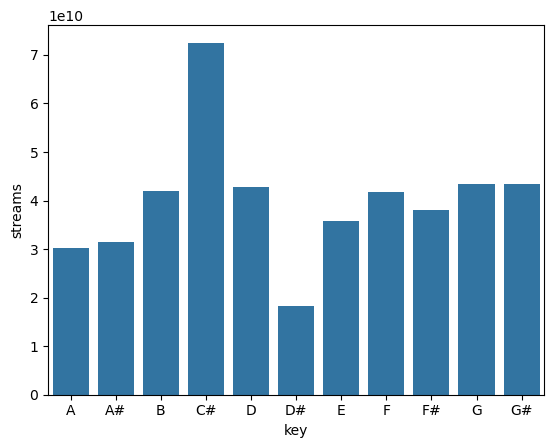

In [7]:
# Agrupar por 'key', sumar los streams y obtener un DataFrame
streams_per_musical_key = spotify_data.groupby('key', as_index=False).agg(
    streams=('streams', 'sum'),
    count=('key', 'count')
)

sns.barplot(x = 'key', y = 'streams', data = streams_per_musical_key)

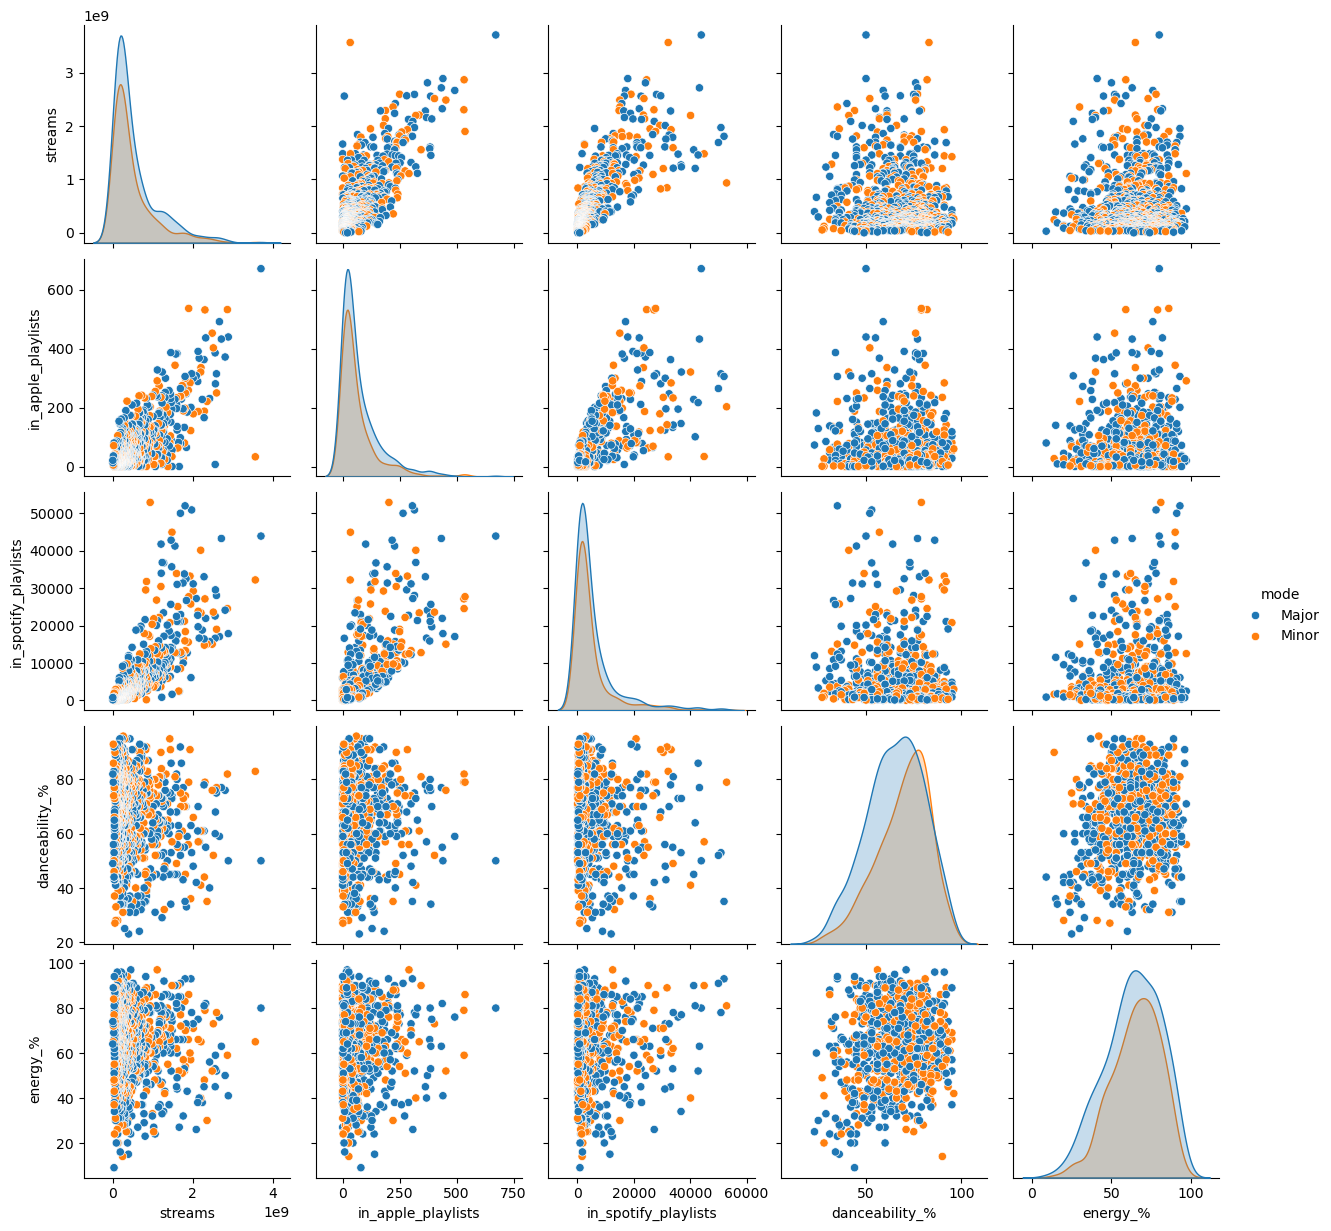

In [47]:
spotify_data_limitated = spotify_data.loc[:, ['streams', 'in_apple_playlists', 'in_spotify_playlists', 'key', 'mode', 'danceability_%', 'energy_%']]
sns.pairplot(spotify_data_limitated, hue = 'mode')
# sns.pairplot(iris, hue = 'species')

In [48]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
    spotify_data_limitated[['in_apple_playlists', 'in_spotify_playlists', 'danceability_%', 'energy_%']].values
)

covariance_matrix = np.cov(scaled.T)
print(covariance_matrix)

[[ 1.00105042  0.70902117 -0.02535284  0.05267052]
 [ 0.70902117  1.00105042 -0.10664558  0.03384322]
 [-0.02535284 -0.10664558  1.00105042  0.19830293]
 [ 0.05267052  0.03384322  0.19830293  1.00105042]]


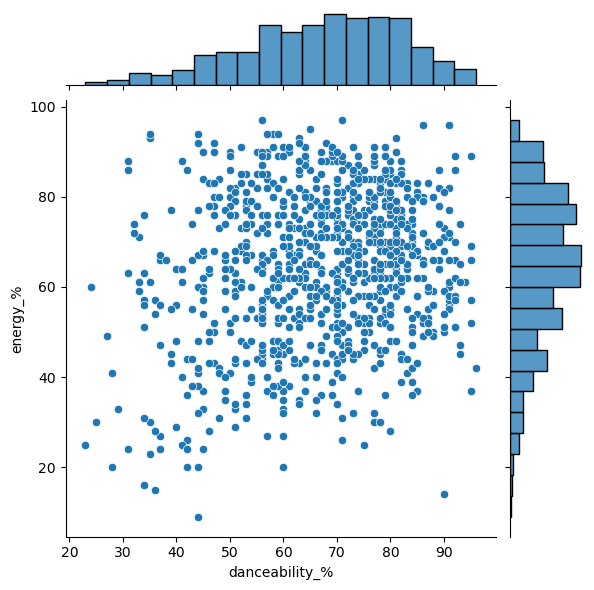

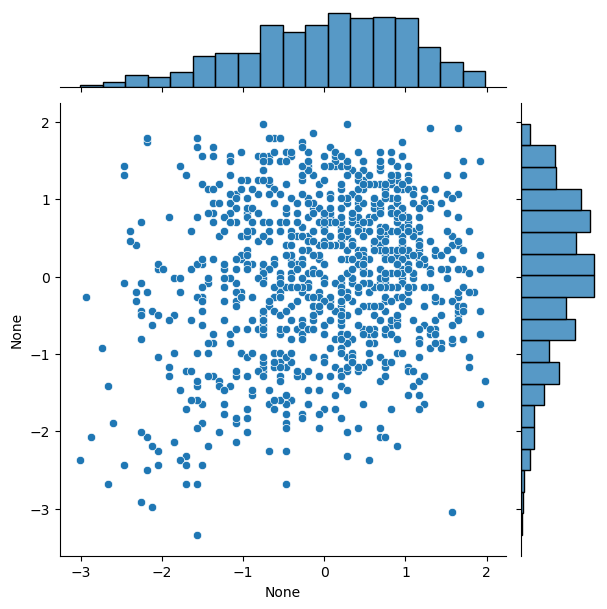

In [49]:
sns.jointplot(x= spotify_data['danceability_%'], y=spotify_data['energy_%'])
sns.jointplot(x = scaled[:, 2], y = scaled[:,3])

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [51]:
pca.explained_variance_ratio_

array([0.43055729, 0.29996429])

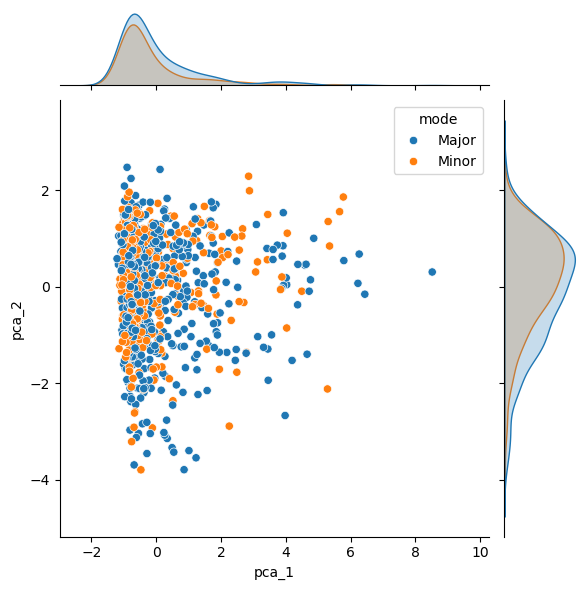

In [54]:
reduced_scaled = pca.transform(scaled)

# print(reduced_scaled)
spotify_data['pca_1'] = reduced_scaled[:,0]
spotify_data['pca_2'] = reduced_scaled[:,1]
sns.jointplot(data=spotify_data, x = 'pca_1', y = 'pca_2', hue = 'mode')